## LAB 5 - Seismic raypaths

We can import some of the familar toolkits we have been using already to understand how seismic waves travel through the deep Earth:

```python
#you can use these libraries by refering to their appreviation plt., np., pd. or ccrs
#basic plotting library
import matplotlib.pyplot as plt

#scientifc computing library
import numpy as np

#data analysis tool
import pandas as pd

# mapping toolkit
import cartopy.crs as ccrs
import cartopy

```

In [9]:
#Import them all here
import cartopy.crs as ccrs
import cartopy
import numpy as np
import matplotlib.pyplot as plt
import obspy

Here we will make a new figure - a map of the globe with one seismic station and one earthquake (eq)

/opt/anaconda3/envs/EMSC2022_2020/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:632: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x11cba18f0> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))
/opt/anaconda3/envs/EMSC2022_2020/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:632: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x11cba1bf0> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))


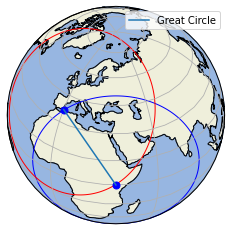

In [4]:
# create new figure, axes instances.
fig=plt.figure()

# setup mercator map projection.
ax = fig.add_subplot(1,1,1, projection=ccrs.Orthographic(37,40))
# plot bathymetry/topgraphy:
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.OCEAN)
ax.gridlines()

# define the station and epicenter of the earthquake
station = dict(lon=37, lat=0)
eq = dict(lon=0, lat=37)
lons = [station['lon'], eq['lon']]
lats = [station['lat'], eq['lat']]

# plot the epicentral (angular) distance and Great Circle Path 
ax.plot(lons, lats, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.plot(lons, lats, label='Great Circle', transform=ccrs.Geodetic())
ax.coastlines()
ax.legend()
ax.set_global()

# define the epicentral (angular) distance Delta and plot this as a circle on the map:
Delta = np.deg2rad(50) * 6370
ax.tissot(rad_km=Delta, lons=station['lon'], lats=station['lat'], n_samples=200, facecolor="None", edgecolor="Blue")
ax.tissot(rad_km=Delta, lons=eq['lon'], lats=eq['lat'],           n_samples=200, facecolor="None", edgecolor="Red")

plt.show()


Now you make a new map of the globe but following the instructions listed in Part III of the Lab5 document on Wattle

In [ ]:
#Try it here!


Now make a figure of ray paths through the Earth based upon the parameters listed below.  Change the depth of the earthquake and the phases plotted to see how they compare.

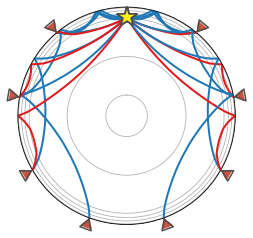

In [5]:
#Try it here!
from obspy.taup.tau import plot_ray_paths

fig, ax = plt.subplots(subplot_kw=dict(polar=True))
ax = plot_ray_paths(source_depth=600, ax=ax, fig=fig, phase_list=['PP', 'SP', 'SKP'],
                    npoints=10)

Now you can make another more detailed figure of all the different seismic phases listed in the PHASES below

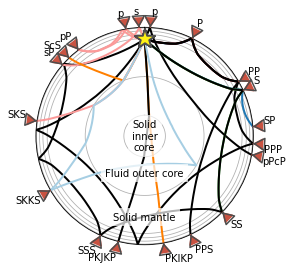

In [6]:
from obspy.taup import TauPyModel

PHASES = [
    # Phase, distance
    ('P', 26),
    ('PP', 60),
    ('PPP', 94),
    ('PPS', 155),
    ('p', 3),
    ('pPcP', 100),
    ('PKIKP', 170),
    ('PKJKP', 194),
    ('S', 65),
    ('SP', 85),
    ('SS', 134.5),
    ('SSS', 204),
    ('p', -10),
    ('pP', -37.5),
    ('s', -3),
    ('sP', -49),
    ('ScS', -44),
    ('SKS', -82),
    ('SKKS', -120),
]

model = TauPyModel(model='iasp91')

fig, ax = plt.subplots(subplot_kw=dict(polar=True))

# Plot all pre-determined phases
for phase, distance in PHASES:
    arrivals = model.get_ray_paths(700, distance, phase_list=[phase])
    ax = arrivals.plot_rays(plot_type='spherical',
                            legend=False, label_arrivals=True,
                            plot_all=True,
                            show=False, ax=ax)

# Annotate regions
ax.text(0, 0, 'Solid\ninner\ncore',
        horizontalalignment='center', verticalalignment='center',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
ocr = (model.model.radius_of_planet -
       (model.model.s_mod.v_mod.iocb_depth +
        model.model.s_mod.v_mod.cmb_depth) / 2)
ax.text(np.deg2rad(180), ocr, 'Fluid outer core',
        horizontalalignment='center',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
mr = model.model.radius_of_planet - model.model.s_mod.v_mod.cmb_depth / 2
ax.text(np.deg2rad(180), mr, 'Solid mantle',
        horizontalalignment='center',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

plt.show()